In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import json
import numpy as np

In [25]:
pd.set_option('display.max_rows', None)

In [130]:
soup = BeautifulSoup(open(r'a1.html', encoding='utf-8'))

In [131]:
names = [name.string.strip() for name in soup.find_all('div', 'name___3jt4_')]

codes = [code.string.strip() for code in soup.find_all('div', 'code___1acmC')]

df = pd.DataFrame({'code':codes, 'name':names})


In [132]:
df

,code,name
0,000552,靖远煤电
1,601000,唐山港
2,600757,长江传媒
3,601088,中国神华
4,601006,大秦铁路
...,...,...
95,000799,酒鬼酒
96,603387,基蛋生物
97,603596,伯特利
98,002947,恒铭达


<!DOCTYPE html>
<html lang="en"><head><link href="/moyu100/static/umi.42493ef9.css" rel="stylesheet"/><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="fullscreen=yes,useHistoryState=yes,transition=yes" name="App-Config"/><meta content="yes" name="apple-mobile-web-app-capable/"/><meta content="yes" name="apple-touch-fullscreen/"/><meta content="telephone=no,email=no" name="format-detection/"/><meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no,viewport-fit=cover" name="viewport"/><meta content="no-cache" http-equiv="Pragma"/><meta content="no-cache" http-equiv="Cache-Control"/><title>WECHAT_EMPTY_TITLE</title><link href="https://guojiugo.moyugroup.com/readhub/moyugroup_logo.png" rel="icon" type="image/png"/><!-- Matomo --><script async="" defer="" src="//m.moyugroup.com/matomo.js" type="text/javascript"></script><script type="text/javascript">var _paq = window._paq || [];
      /* tracker methods l
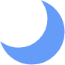
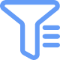
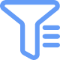
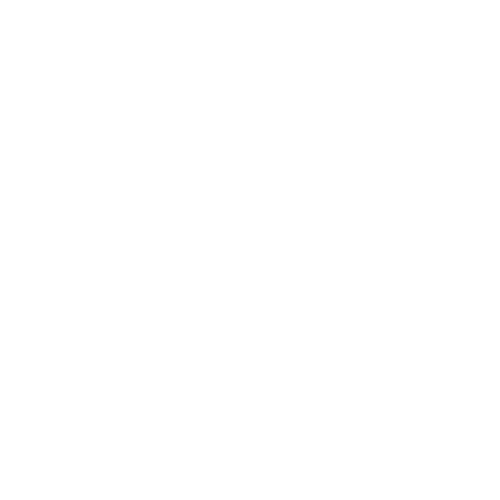
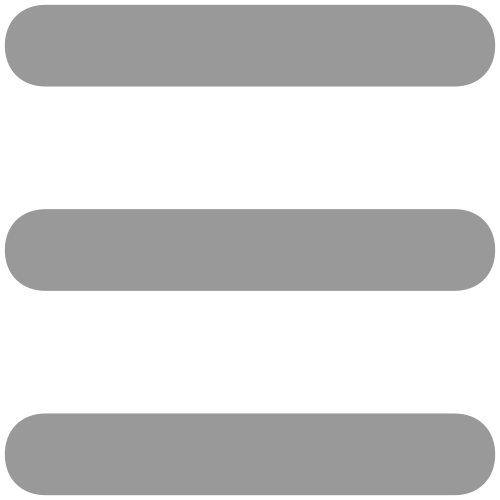

In [133]:
soup

In [134]:
soup.find_all('div', id='card')[0].div # bs4.element.Tag

<div _echarts_instance_="ec_1599532096129" class="echarts-for-react" size-sensor-id="1" style="height: 250px; width: 100%; -webkit-tap-highlight-color: transparent; -webkit-user-select: none; position: relative;"><div style="position: relative; width: 624px; height: 250px; padding: 0px; margin: 0px; border-width: 0px; cursor: pointer;"><canvas data-zr-dom-id="zr_0" height="250" style="position: absolute; left: 0px; top: 0px; width: 624px; height: 250px; -webkit-user-select: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0); padding: 0px; margin: 0px; border-width: 0px;" width="624"></canvas><canvas data-zr-dom-id="zr_10000" height="250" style="position: absolute; left: 0px; top: 0px; width: 624px; height: 250px; -webkit-user-select: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0); padding: 0px; margin: 0px; border-width: 0px;" width="624"></canvas></div><object class="size-sensor-object" data="about:blank" style="display: block; position: absolute; top: 0px; left: 0px; height: 10

In [135]:
soup.find_all('div', id='card')[0].div.attrs

{'class': ['echarts-for-react'],
 '_echarts_instance_': 'ec_1599532096129',
 'size-sensor-id': '1',
 'style': 'height: 250px; width: 100%; -webkit-tap-highlight-color: transparent; -webkit-user-select: none; position: relative;'}

In [136]:
soup.find_all('div', id='card')[0].div['class']

['echarts-for-react']

In [137]:
soup.find_all('div', id='card')[0].div.name

'div'

In [138]:
soup_div = soup.find_all('div', id='card')[0].div

In [139]:
soup_div.attrs # 

{'class': ['echarts-for-react'],
 '_echarts_instance_': 'ec_1599532096129',
 'size-sensor-id': '1',
 'style': 'height: 250px; width: 100%; -webkit-tap-highlight-color: transparent; -webkit-user-select: none; position: relative;'}

In [140]:
soup_div.contents

[<div style="position: relative; width: 624px; height: 250px; padding: 0px; margin: 0px; border-width: 0px; cursor: pointer;"><canvas data-zr-dom-id="zr_0" height="250" style="position: absolute; left: 0px; top: 0px; width: 624px; height: 250px; -webkit-user-select: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0); padding: 0px; margin: 0px; border-width: 0px;" width="624"></canvas><canvas data-zr-dom-id="zr_10000" height="250" style="position: absolute; left: 0px; top: 0px; width: 624px; height: 250px; -webkit-user-select: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0); padding: 0px; margin: 0px; border-width: 0px;" width="624"></canvas></div>,
 <object class="size-sensor-object" data="about:blank" style="display: block; position: absolute; top: 0px; left: 0px; height: 100%; width: 100%; overflow: hidden; pointer-events: none; z-index: -1; opacity: 0;" tabindex="-1" type="text/html"></object>,
 <div style='position: absolute; display: block; border-style: solid; white-space: n

In [141]:
soup_div.children

In [145]:
soup_div.div.next_sibling.next_sibling

<div style='position: absolute; display: block; border-style: solid; white-space: nowrap; z-index: 9999999; transition: left 0.4s cubic-bezier(0.23, 1, 0.32, 1), top 0.4s cubic-bezier(0.23, 1, 0.32, 1); background-color: rgba(50, 50, 50, 0.701961); border-width: 0px; border-color: rgb(51, 51, 51); border-radius: 4px; color: rgb(255, 255, 255); font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 14px; font-family: "Microsoft YaHei"; line-height: 21px; padding: 5px; left: 409px; top: 3px; pointer-events: none;'>
<div>
<div>麦格米特(002851)</div>
<div>摸鱼得分：86</div>
<div>市值：153.24 亿</div>
<div>PB：7.7</div>
<div>ROE：17.77%</div>
</div>
</div>

In [146]:
for sibling in soup_div.div.next_siblings:
    print(sibling)

<object class="size-sensor-object" data="about:blank" style="display: block; position: absolute; top: 0px; left: 0px; height: 100%; width: 100%; overflow: hidden; pointer-events: none; z-index: -1; opacity: 0;" tabindex="-1" type="text/html"></object>
<div style='position: absolute; display: block; border-style: solid; white-space: nowrap; z-index: 9999999; transition: left 0.4s cubic-bezier(0.23, 1, 0.32, 1), top 0.4s cubic-bezier(0.23, 1, 0.32, 1); background-color: rgba(50, 50, 50, 0.701961); border-width: 0px; border-color: rgb(51, 51, 51); border-radius: 4px; color: rgb(255, 255, 255); font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 14px; font-family: "Microsoft YaHei"; line-height: 21px; padding: 5px; left: 409px; top: 3px; pointer-events: none;'>
<div>
<div>麦格米特(002851)</div>
<div>摸鱼得分：86</div>
<div>市值：153.24 亿</div>
<div>PB：7.7</div>
<div>ROE：17.77%</div>
</div>
</div>


In [147]:
siblings = [sibling for sibling in soup_div.div.next_siblings]

In [150]:
siblings[1].div

<div>
<div>麦格米特(002851)</div>
<div>摸鱼得分：86</div>
<div>市值：153.24 亿</div>
<div>PB：7.7</div>
<div>ROE：17.77%</div>
</div>

In [152]:
for s in siblings[1].div.next_siblings:
    print(s.strip())

In [154]:
siblings[1].div

<div>
<div>麦格米特(002851)</div>
<div>摸鱼得分：86</div>
<div>市值：153.24 亿</div>
<div>PB：7.7</div>
<div>ROE：17.77%</div>
</div>

In [156]:
type(siblings[1].div)

bs4.element.Tag

In [157]:
type(siblings[1])

bs4.element.Tag

In [158]:
siblings[1].div

<div>
<div>麦格米特(002851)</div>
<div>摸鱼得分：86</div>
<div>市值：153.24 亿</div>
<div>PB：7.7</div>
<div>ROE：17.77%</div>
</div>

In [23]:
[s for s in siblings[3].next_siblings]

['\n']

In [24]:
cc = [c for c in siblings[3].children]

In [25]:
xx = [x for x in siblings[3].div.children]

In [26]:
cc[2]

'\n'

In [27]:
xx[3]

<div>
           摸鱼得分：84
          </div>

In [28]:
# 小结

In [171]:
# Step 1:
soup = BeautifulSoup(open(r'moyu100.html', encoding='utf-8'))

In [30]:
# Step 2:
names = [name.string.strip() for name in soup.find_all('div', 'name___3jt4_')] # <div class="name___3jt4_">

codes = [code.string.strip() for code in soup.find_all('div', 'code___1acmC')] # <div class="code___1acmC">

df = pd.DataFrame({'code':codes, 'name':names})
df

,code,name
0,000552,靖远煤电
1,601000,唐山港
2,600757,长江传媒
3,601088,中国神华
4,601006,大秦铁路
...,...,...
95,000799,酒鬼酒
96,603387,基蛋生物
97,603596,伯特利
98,002947,恒铭达


In [159]:
# Step 3：定位到  <div id="card">
soup_card = soup.find_all('div', id='card')[0].div

In [231]:
card = soup_card.find_all('div', string=re.compile('(\d+)'))
card

[<div>麦格米特(002851)</div>,
 <div>摸鱼得分：86</div>,
 <div>市值：153.24 亿</div>,
 <div>PB：7.7</div>,
 <div>ROE：17.77%</div>]

In [232]:
len(card)

5

In [241]:
card_string = [c.string for c in card]

In [242]:
card_string

['麦格米特(002851)', '摸鱼得分：86', '市值：153.24 亿', 'PB：7.7', 'ROE：17.77%']

In [236]:
card[0].string

'麦格米特(002851)'

In [243]:
re.sub(r'\D', "", card_string[0]) # re.sub(pattern, repl, string, count=0, flags=0) ## 删除非数字(-)的字符串 

'002851'

In [244]:
re.search('\w+', card_string[0]).group()

'麦格米特'

In [247]:
card_string[1].split('：')

['摸鱼得分', '86']

In [249]:
card_PAPR = list(map(lambda x:{x.split("：")[0]:x.split("：")[1]}, card_string[1:])) # map(a, b) ## a 是函数，用来处理 b 参数 ## b 是可迭代对象

In [252]:
card_PAPR[0].get('摸鱼得分')

'86'

In [240]:
card[2].string

'市值：153.24 亿'

In [219]:
[soup_card.find_all('div', string=re.compile('摸鱼得分'))[0].string,
soup_card.find_all('div', string=re.compile('市值'))[0].string,
soup_card.find_all('div', string=re.compile('PB'))[0].string,
soup_card.find_all('div', string=re.compile('ROE'))[0].string]



['摸鱼得分：86', '市值：153.24 亿', 'PB：7.7', 'ROE：17.77%']

In [220]:
card = [soup_card.find_all('div', string=re.compile('摸鱼得分'))[0].string,
                soup_card.find_all('div', string=re.compile('市值'))[0].string,
                soup_card.find_all('div', string=re.compile('PB'))[0].string,
                soup_card.find_all('div', string=re.compile('ROE'))[0].string]

In [221]:
card

['摸鱼得分：86', '市值：153.24 亿', 'PB：7.7', 'ROE：17.77%']

In [162]:
children = [child for  child in soup_card.children]
children

[<div style="position: relative; width: 624px; height: 250px; padding: 0px; margin: 0px; border-width: 0px; cursor: pointer;"><canvas data-zr-dom-id="zr_0" height="250" style="position: absolute; left: 0px; top: 0px; width: 624px; height: 250px; -webkit-user-select: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0); padding: 0px; margin: 0px; border-width: 0px;" width="624"></canvas><canvas data-zr-dom-id="zr_10000" height="250" style="position: absolute; left: 0px; top: 0px; width: 624px; height: 250px; -webkit-user-select: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0); padding: 0px; margin: 0px; border-width: 0px;" width="624"></canvas></div>,
 <object class="size-sensor-object" data="about:blank" style="display: block; position: absolute; top: 0px; left: 0px; height: 100%; width: 100%; overflow: hidden; pointer-events: none; z-index: -1; opacity: 0;" tabindex="-1" type="text/html"></object>,
 <div style='position: absolute; display: block; border-style: solid; white-space: n

In [164]:
children

[<div style="position: relative; width: 624px; height: 250px; padding: 0px; margin: 0px; border-width: 0px; cursor: pointer;"><canvas data-zr-dom-id="zr_0" height="250" style="position: absolute; left: 0px; top: 0px; width: 624px; height: 250px; -webkit-user-select: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0); padding: 0px; margin: 0px; border-width: 0px;" width="624"></canvas><canvas data-zr-dom-id="zr_10000" height="250" style="position: absolute; left: 0px; top: 0px; width: 624px; height: 250px; -webkit-user-select: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0); padding: 0px; margin: 0px; border-width: 0px;" width="624"></canvas></div>,
 <object class="size-sensor-object" data="about:blank" style="display: block; position: absolute; top: 0px; left: 0px; height: 100%; width: 100%; overflow: hidden; pointer-events: none; z-index: -1; opacity: 0;" tabindex="-1" type="text/html"></object>,
 <div style='position: absolute; display: block; border-style: solid; white-space: n

In [34]:
child6.div

<div>
<div>
           迎驾贡酒(603198)
          </div>
<div>
           摸鱼得分：84
          </div>
<div>
           市值：188.32 亿
          </div>
<div>
           PB：4.17
          </div>
<div>
           ROE：18.11%
          </div>
</div>

In [35]:
# Step 4
child6.div

<div>
<div>
           迎驾贡酒(603198)
          </div>
<div>
           摸鱼得分：84
          </div>
<div>
           市值：188.32 亿
          </div>
<div>
           PB：4.17
          </div>
<div>
           ROE：18.11%
          </div>
</div>

In [36]:
cc = [c.string.strip() for c in child6.div.children if c!='\n'] # - string.strip() 去掉前后空格  - if c!='\n' 列表排除 换行符

In [37]:
cc

['迎驾贡酒(603198)', '摸鱼得分：84', '市值：188.32 亿', 'PB：4.17', 'ROE：18.11%']

In [38]:
cc[1].split("：")

['摸鱼得分', '84']

In [39]:
{cc[1].split("：")[0]:cc[1].split("：")[1]}

{'摸鱼得分': '84'}

In [40]:
list(map(lambda x:{x.split("：")[0]:x.split("：")[1]}, cc[1:])) # map(a, b) ## a 是函数，用来处理 b 参数 ## b 是可迭代对象

[{'摸鱼得分': '84'}, {'市值': '188.32 亿'}, {'PB': '4.17'}, {'ROE': '18.11%'}]

In [41]:
# Step 5:


In [46]:
cc[1]

'摸鱼得分：84'

In [43]:
re.sub(r'\D', "", cc[0]) # re.sub(pattern, repl, string, count=0, flags=0) ## 删除非数字(-)的字符串 

'603198'

In [58]:
re.search('\w+', cc[0]).group()

'迎驾贡酒'

In [44]:
df

,code,name
0,000552,靖远煤电
1,601000,唐山港
2,600757,长江传媒
3,601088,中国神华
4,601006,大秦铁路
...,...,...
95,000799,酒鬼酒
96,603387,基蛋生物
97,603596,伯特利
98,002947,恒铭达


In [112]:
class Share(object):
    def __init__(self, html_doc: str):
        self.code = ''
        self.name = ''
        self.amount = 0
        self.point = 0
        self.PB = 0
        self.ROE = 0
        self.stocks = []
        self.code_list = []
        self.df = pd.DataFrame
        self.doc = html_doc

    def demo(self):
        soup = BeautifulSoup(open(self.doc, encoding='utf-8'), features='lxml')
        self.stocks = [name.string.strip() for name in
                       soup.find_all('div', 'name___3jt4_')]  # <div class="name___3jt4_">
        self.code_list = [code.string.strip() for code in
                          soup.find_all('div', 'code___1acmC')]  # <div class="code___1acmC">
        self.df = pd.DataFrame({'代码': self.code_list, '股票名称': self.stocks})
        soup_card = soup.find_all('div', id='card')[0].div
        children = [child for child in soup_card.children]
        child6 = children[5]  # 定位到 soup_card 第 6 个 child
        result = [c.string.strip() for c in child6.div.children if
                            c != '\n']  # - string.strip() 去掉前后空格  - if c!='\n' 列表排除 换行符
        self.code = re.sub(r'\D', "", result[0])
        self.name = re.search(r'\w+', result[0]).group()
        obj = list(
            map(lambda x: {x.split("：")[0]: x.split("：")[1]},
                result[1:]))  # map(a, b) ## a 是函数，用来处理 b 参数 ## b 是可迭代对象
        self.point = obj[0].get('摸鱼得分')
        self.amount = obj[1].get('市值')
        self.PB = obj[2].get('PB')
        self.ROE = obj[3].get('ROE')
    def assemble(self):
        self.demo()
        self.df.loc[self.df['代码'] == self.code, '摸鱼得分'] = self.point
        self.df.loc[self.df['代码'] == self.code, '市值'] = self.amount
        self.df.loc[self.df['代码'] == self.code, 'PB'] = self.PB
        self.df.loc[self.df['代码'] == self.code, 'ROE'] = self.ROE

In [113]:
share = Share('moyu100.html')

In [114]:
share.demo()

In [115]:
share.PB

'4.17'

In [116]:
share.amount

'188.32 亿'

In [117]:
share.df

,代码,股票名称
0,000552,靖远煤电
1,601000,唐山港
2,600757,长江传媒
3,601088,中国神华
4,601006,大秦铁路
...,...,...
95,000799,酒鬼酒
96,603387,基蛋生物
97,603596,伯特利
98,002947,恒铭达


In [118]:
share.df['摸鱼得分']=0

In [119]:
share.df.apply(lambda x:x[0])

代码      000552
股票名称      靖远煤电
摸鱼得分         0
dtype: object

In [120]:
share.df.loc[share.df['代码']==share.code, '摸鱼得分'] =share.point

In [121]:
share.point

'84'

In [122]:
share.code =='603198'

True

In [123]:
share.df.iloc[61]

代码      603198
股票名称      迎驾贡酒
摸鱼得分        84
Name: 61, dtype: object

In [126]:
share.assemble()

In [128]:
share.df

,代码,股票名称,摸鱼得分,市值,PB,ROE
0,000552,靖远煤电,NaN,NaN,NaN,NaN
1,601000,唐山港,NaN,NaN,NaN,NaN
2,600757,长江传媒,NaN,NaN,NaN,NaN
3,601088,中国神华,NaN,NaN,NaN,NaN
4,601006,大秦铁路,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,000799,酒鬼酒,NaN,NaN,NaN,NaN
96,603387,基蛋生物,NaN,NaN,NaN,NaN
97,603596,伯特利,NaN,NaN,NaN,NaN
98,002947,恒铭达,NaN,NaN,NaN,NaN


In [278]:
class Share(object):
    def __init__(self, **kwargs):
        self.code = ''
        self.name = ''
        self.amount = ''
        self.point = 0
        self.PB = 0
        self.ROE = 0
        self.stocks = []
        self.code_list = []
        self.doc = kwargs.get('doc_html')
        if kwargs.get('file_csv'):
            file_path = kwargs.get('file_csv')
            self.df = pd.read_csv(file_path, encoding='gbk')
        else:
            self.df = pd.DataFrame()

    def demo(self):
        soup = BeautifulSoup(open(self.doc, encoding='utf-8'), features='lxml')
        if self.df.empty:
            self.stocks = [name.string.strip() for name in
                           soup.find_all('div', 'name___3jt4_')]  # <div class="name___3jt4_">
            self.code_list = [code.string.strip() for code in
                              soup.find_all('div', 'code___1acmC')]  # <div class="code___1acmC">

            self.df = pd.DataFrame({'股票代码': self.code_list, '股票名称': self.stocks})
        soup_card = soup.find_all('div', id='card')[0].div
        soup_card.find_all('div', string=re.compile('(\d+)'))
        card = soup_card.find_all('div', string=re.compile('(\d+)'))
        if len(card) == 5:
            card_string = [c.string.strip() for c in card]
            self.code = re.sub(r'\D', "",
                               card_string[0])  # re.sub(pattern, repl, string, count=0, flags=0) ## 删除非数字(-)的字符串
            self.name = re.search('\w+', card_string[0]).group()
            card_paPR = list(map(lambda x: {x.split("：")[0]: x.split("：")[1]},
                                 card_string[1:]))  # map(a, b) ## a 是函数，用来处理 b 参数 ## b 是可迭代对象
            self.point = card_paPR[0].get('摸鱼得分')
            self.amount = card_paPR[1].get('市值')
            self.PB = card_paPR[2].get('PB')
            self.ROE = card_paPR[3].get('ROE')
            self.df.loc[self.df['股票代码'] == self.code, '摸鱼得分'] = self.point
            self.df.loc[self.df['股票代码'] == self.code, '市值'] = self.amount
            self.df.loc[self.df['股票代码'] == self.code, 'PB'] = self.PB
            self.df.loc[self.df['股票代码'] == self.code, 'ROE'] = self.ROE
            # self.df.to_csv(r'moyu100.csv', encoding='gbk', index=False)
            return self.df




In [279]:
share = Share(doc_html='moyu100.html', file_csv='moyu100.csv')


In [280]:
share.df

,股票代码,股票名称,摸鱼得分,市值,PB,ROE
0,552,靖远煤电,NaN,NaN,NaN,NaN
1,601000,唐山港,NaN,NaN,NaN,NaN
2,600757,长江传媒,NaN,NaN,NaN,NaN
3,601088,中国神华,NaN,NaN,NaN,NaN
4,601006,大秦铁路,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,799,酒鬼酒,NaN,NaN,NaN,NaN
96,603387,基蛋生物,NaN,NaN,NaN,NaN
97,603596,伯特利,NaN,NaN,NaN,NaN
98,2947,恒铭达,NaN,NaN,NaN,NaN


In [281]:
share.demo()

c:\users\v\anaconda3\envs\xbx_python\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,股票代码,股票名称,摸鱼得分,市值,PB,ROE
0,552,靖远煤电,NaN,NaN,NaN,NaN
1,601000,唐山港,NaN,NaN,NaN,NaN
2,600757,长江传媒,NaN,NaN,NaN,NaN
3,601088,中国神华,NaN,NaN,NaN,NaN
4,601006,大秦铁路,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,799,酒鬼酒,NaN,NaN,NaN,NaN
96,603387,基蛋生物,NaN,NaN,NaN,NaN
97,603596,伯特利,NaN,NaN,NaN,NaN
98,2947,恒铭达,NaN,NaN,NaN,NaN


In [282]:
share.point

'84'

In [283]:
soup_card

<div _echarts_instance_="ec_1599045278398" class="echarts-for-react" size-sensor-id="1" style="height: 250px; width: 100%; -webkit-tap-highlight-color: transparent; -webkit-user-select: none; position: relative;">
<div style="position: relative; width: 1520px; height: 250px; padding: 0px; margin: 0px; border-width: 0px; cursor: default;">
<canvas data-zr-dom-id="zr_0" height="250" style="position: absolute; left: 0px; top: 0px; width: 1520px; height: 250px; -webkit-user-select: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0); padding: 0px; margin: 0px; border-width: 0px;" width="1520"></canvas>
<canvas data-zr-dom-id="zr_10000" height="250" style="position: absolute; left: 0px; top: 0px; width: 1520px; height: 250px; -webkit-user-select: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0); padding: 0px; margin: 0px; border-width: 0px;" width="1520"></canvas>
</div>
<object class="size-sensor-object" data="about:blank" style="display: block; position: absolute; top: 0px; left: 0px; 

In [284]:
share.doc

'moyu100.html'

In [285]:
share.df

,股票代码,股票名称,摸鱼得分,市值,PB,ROE
0,552,靖远煤电,NaN,NaN,NaN,NaN
1,601000,唐山港,NaN,NaN,NaN,NaN
2,600757,长江传媒,NaN,NaN,NaN,NaN
3,601088,中国神华,NaN,NaN,NaN,NaN
4,601006,大秦铁路,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,799,酒鬼酒,NaN,NaN,NaN,NaN
96,603387,基蛋生物,NaN,NaN,NaN,NaN
97,603596,伯特利,NaN,NaN,NaN,NaN
98,2947,恒铭达,NaN,NaN,NaN,NaN


In [286]:
share.code

'603198'

In [287]:
share.name

'迎驾贡酒'

In [288]:
share.point

'84'

In [289]:
share.PB

'4.17'

In [290]:
share.ROE

'18.11%'

In [293]:
share.df.loc[share.df['股票代码'] == share.code, '摸鱼得分'] = share.point

c:\users\v\anaconda3\envs\xbx_python\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [302]:
share.df[share.df['股票代码'] == share.code]

,股票代码,股票名称,摸鱼得分,市值,PB,ROE


In [304]:
share.code =='603198'

True

In [305]:
share.code

'603198'

In [306]:
share = Share(doc_html='a1.html', file_csv='moyu100.csv')

In [307]:
share.demo()

c:\users\v\anaconda3\envs\xbx_python\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,股票代码,股票名称,摸鱼得分,市值,PB,ROE
0,552,靖远煤电,NaN,NaN,NaN,NaN
1,601000,唐山港,NaN,NaN,NaN,NaN
2,600757,长江传媒,NaN,NaN,NaN,NaN
3,601088,中国神华,NaN,NaN,NaN,NaN
4,601006,大秦铁路,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,799,酒鬼酒,NaN,NaN,NaN,NaN
96,603387,基蛋生物,NaN,NaN,NaN,NaN
97,603596,伯特利,NaN,NaN,NaN,NaN
98,2947,恒铭达,NaN,NaN,NaN,NaN


In [308]:
share.code

'002851'

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import re


class Share(object):
    def __init__(self, **kwargs):
        self.code = ''
        self.name = ''
        self.amount = ''
        self.point = 0
        self.PB = 0
        self.ROE = 0
        self.stocks = []
        self.code_list = []
        self.doc = kwargs.get('doc_html')
        if kwargs.get('file_csv'):
            file_path = kwargs.get('file_csv')
            self.df = pd.read_csv(file_path, encoding='gbk', dtype={'股票代码': str})
        else:
            self.df = pd.DataFrame()

    def demo(self):
        soup = BeautifulSoup(open(self.doc, encoding='utf-8'), features='lxml')
        if self.df.empty:
            self.stocks = [name.string.strip() for name in
                           soup.find_all('div', 'name___3jt4_')]  # <div class="name___3jt4_">
            self.code_list = [code.string.strip() for code in
                              soup.find_all('div', 'code___1acmC')]  # <div class="code___1acmC">

            self.df = pd.DataFrame({'股票代码': self.code_list, '股票名称': self.stocks})
        soup_card = soup.find_all('div', id='card')[0].div
        card = soup_card.find_all('div', string=re.compile('(\d+)'))
        if len(card) == 5:
            card_string = [c.string.strip() for c in card]
            self.code = re.sub(r'\D', "",
                               card_string[0])  # re.sub(pattern, repl, string, count=0, flags=0) ## 删除非数字(-)的字符串
            self.name = re.search('\w+', card_string[0]).group()
            card_paPR = list(map(lambda x: {x.split("：")[0]: x.split("：")[1]},
                                 card_string[1:]))  # map(a, b) ## a 是函数，用来处理 b 参数 ## b 是可迭代对象
            self.point = card_paPR[0].get('摸鱼得分')
            self.amount = card_paPR[1].get('市值')
            self.PB = card_paPR[2].get('PB')
            self.ROE = card_paPR[3].get('ROE')
            self.df.loc[self.df['股票代码'] == self.code, '摸鱼得分'] = self.point
            self.df.loc[self.df['股票代码'] == self.code, '市值'] = self.amount
            self.df.loc[self.df['股票代码'] == self.code, 'PB'] = self.PB
            self.df.loc[self.df['股票代码'] == self.code, 'ROE'] = self.ROE
            self.df.to_csv(r'moyu100.csv', encoding='gbk', index=False)
            print(self.df[self.df['PB'].isna()]['股票名称'])
            print(self.df.count())
            return self.df


if __name__ == '__main__':
    share = Share(doc_html='a1.html', file_csv='moyu100.csv')
    share.demo()


In [19]:
df = pd.read_csv('moyu100.csv',  encoding='gbk', dtype={'股票代码':str})